# Project 2: Digit Recognition

## Statistical Machine Learning (COMP90051), Semester 2, 2017

*Copyright the University of Melbourne, 2017*

### Submitted by:  *Yueni Chang*
### Student number: *884622*
### Kaggle-in-class username: *nikiki*

In this project, you will be applying machine learning for recognising digits from real world images. The project worksheet is a combination of text, pre-implemented code and placeholders where we expect you to add your code and answers. You code should produce desired result within a reasonable amount of time. Please follow the instructions carefully, **write your code and give answers only where specifically asked**. In addition to worksheet completion, you are also expected to participate **live competition with other students in the class**. The competition will be run using an on-line platform called Kaggle.

** Marking:** You can get up to 33 marks for Project 2. The sum of marks for Project 1 and Project 2 is then capped to 50 marks

**Due date:** Wednesday 11/Oct/17, 11:59pm AEST (LMS components); and Kaggle competition closes Monday 09/Oct/17, 11:59pm AEST.

**Late submissions** will incur a 10% penalty per calendar day

** Submission materials**
 - **Worksheet**: Fill in your code and answers within this IPython Notebook worksheet.
 - **Competition**: Follow the instructions provided in the corresponding section of this worksheet. Your competition submissions should be made via Kaggle website.
 - **Report**: The report about your competition entry should be submitted to the LMS as a PDF file (see format requirements in `2.2`).
 - **Code**: The source code behind your competition entry.
The **Worksheet**, **Report** and **Code** should be bundled into a `.zip` file (not 7z, rar, tar, etc) and submitted in the LMS. Marks will be deducted for submitting files in other formats, or we may elect not to mark them at all.

**Academic Misconduct:** Your submission should contain only your own work and ideas. Where asked to write code, you cannot re-use someone else's code, and should write your own implementation. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**Table of Contents**

1. Handwritten Digit Recognition **(16 marks)**
  1. Linear Approach
  2. Basis Expansion
  3. Kernel Perceptron
  4. Dimensionality Reduction
  
2. Kaggle Competition **(17 marks)**
  1. Making Submissions
  2. Method Description

## 1. Handwritten Digit Recognition
Handwritten digit recognition can be framed as a classification task: given a bitmap image as input, predict the digit type (0, 1, ..., 9). The pixel values in each position of the image form our features, and the digit type is the class. We are going to use a dataset where the digits are represented as *28 x 28* bitmap images. Each pixel value ranges between 0 and 1, and represents the monochrome ink intensity at that position. Each image matrix has been flattened into one long feature vector, by concatenating each row of pixels.

In this part of the project, we will only use images of two digits, namely "7" and "9". As such, we will be working on a binary classification problem. *Throughout this first section, our solution is going to be based on the perceptron classifier.*

Start by setting up working environment, and loading the dataset. *Do not override variable `digits`, as this will be used throughout this section.*

In [1]:
%pylab inline

digits = np.loadtxt('digits_7_vs_9.csv', delimiter=' ')

Populating the interactive namespace from numpy and matplotlib


Take some time to explore the dataset. Note that each image of "7" is labeled as -1, and each image of "9" is labeled as +1.

[-1.]


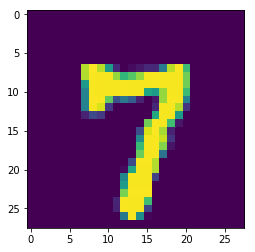

In [73]:
# extract a stack of 28x28 bitmaps
X = digits[:, 0:784]

# extract labels for each bitmap
y = digits[:, 784:785]

# display a single bitmap and print its label
bitmap_index = 0
plt.imshow(X[bitmap_index,:].reshape(28, 28), interpolation=None)
print(y[bitmap_index])

You can also display several bitmaps at once using the following code.

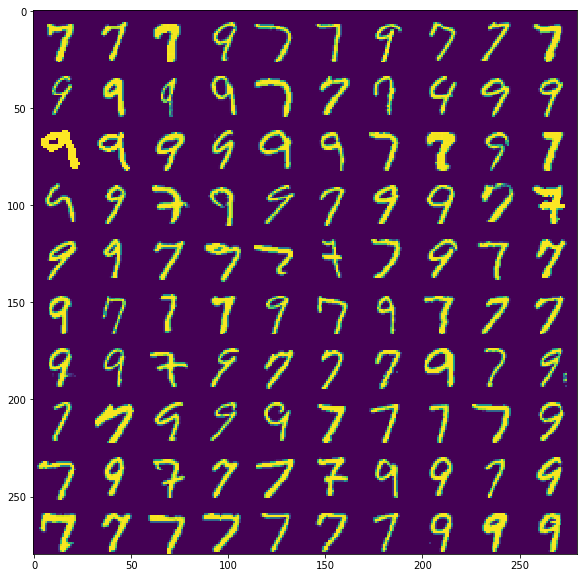

In [3]:
def gallery(array, ncols):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    result = (array.reshape((nrows, ncols, height, width))
              .swapaxes(1,2)
              .reshape((height*nrows, width*ncols)))
    return result

ncols = 10
result = gallery(X.reshape((300, 28, 28))[:ncols**2], ncols)
plt.figure(figsize=(10,10))
plt.imshow(result, interpolation=None)

### 1.1 Linear Approach
We are going to use perceptron for our binary classification task. Recall that perceptron is a linear method. Also, for this first step, we will not apply non-linear transformations to the data.

Implement and fit a perceptron to the data above. You may use the implementation from *sklearn*, or implementation from one of our workshops. Report the error of the fit as the proportion of misclassified examples.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [4]:
from sklearn.linear_model import Perceptron

def error_rate(y, y_hat):
    wrong_labels = len([y1 for (y0,y1) in zip(y,y_hat) if y0!= y1])
    error = float(wrong_labels) / float(len(y_hat))
    return error

# default epochs = 5
clf = Perceptron(fit_intercept = True)
clf.fit(X,y)
y_hat = clf.predict(X)
w = clf.coef_
error = error_rate(y, y_hat)
print('The error rate is:',round(error,4))

C:\Users\Nini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Nini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The error rate is: 0.0067


One of the advantages of a linear approach is the ability to interpret results. To this end, plot the parameters learned above. Exclude the bias term if you were using it, set $w$ to be the learned perceptron weights, and run the following command.

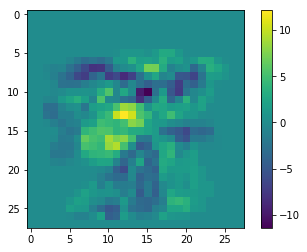

In [5]:
plt.imshow(w.reshape(28,28), interpolation=None)
plt.colorbar()

In a few sentences, describe what you see, referencing which features are most important for making classification. Report any evidence of overfitting.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

<p>From the image and the color-bar above, we can see:</p>

<p>1. When it gets closer to the border of the image, most cells show the color of weight 0, that is these cells(i.e pixels) are not really useful in the classification task. We can recall that in the original images, all images have the same background and most digits are in the middle of the image.</p>

<p>2. As mentioned before, most digits are located in the middle of original images, cells in the middle have weights vary from (-15, +15). </p>

<p> 3. The cells have greatest absolute weights are those of dark blue and bright yellow colors. Thay play a significant role in our classification task. Recall the shapes of digit 7 and 9, it does match our hand-writing habits.</p>

<p> 4. From the image above, we cannot say there is a sign of over-fitting since we use the whole dataset as training set and no held-out validation is provided. However, since we use the whole dataset as training set, there is possibility of over-fitting. Especially, from point 1, we know that the cells near the image border are actually not used in the classification (weights are 0) but for new images the digits may be not in the middle. </p>
<br> </br>

Split the data into training and heldout validation partitions by holding out a random 25% sample of the data. Evaluate the error over the course of a training run, and plot the training and validation error rates as a function of the number of passes over the training dataset.

<br />
<font color='red'>**Write your code in the cell below ...**</font>

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.25)

C:\Users\Nini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best number of epochs is: 6 with the minimal test error: 0.0133


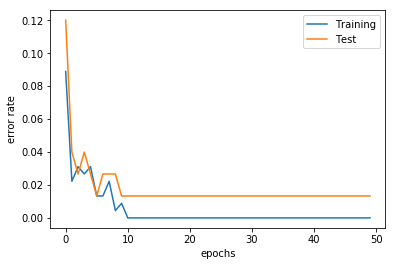

In [84]:
e_start = 1
e_stop = 50
e_step = 1

errors_train = []
errors_test = []

e = e_start
best_e = e_start
min_error = 1
while e <= e_stop:
    clf = Perceptron(fit_intercept = True, max_iter = e)
    clf.fit(x_train, y_train)
    
    y_hat_train = clf.predict(x_train)
    y_hat_test = clf.predict(x_test)
    
    error_train = error_rate(y_train, y_hat_train)
    error_test =  error_rate(y_test, y_hat_test)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    
    if error_test < min_error:
        best_e = e
        min_error = error_test    
    
    e = e + e_step

plt.plot(errors_train, label = 'Training')
plt.plot(errors_test, label = 'Test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('error rate')
print('The best number of epochs is:',best_e, 'with the minimal test error:', round(min_error,4))

In a few sentences, describe the shape of the curves, and compare the two. Now consider if we were to stop training early, can you choose a point such that you get the best classification performance? Justify your choice.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

<p>From the figure above, we can see that:</p>

<p>1. When epoch number is between 1-10, the fluctuation of training error is comparably large and test error follows the same pattern. Roughly, when epoch number increases, training error and test error decreases. After epoch number reaching 10, training error and test error reach a local minimum and keep remain when the number of epochs increases. However, training error is always lower than test error, ther may be over-fitting.</p>

<p>2. Based on the print-out result, considering the randomness, if an early stop is desired, I would recommend using at least 6 as the number of epochs, and 10 would be always reliable.</p>

<br> </br>

Now that we have tried a simple approach, we are going to implement several non-linear approaches to our task. Note that we are still going to use a linear method (the perceptron), but combine this with a non-linear data transformation. We start with basis expansion.

### 1.2 Basis Expansion
Apply Radial Basis Function (RBF)-based transformation to the data, and fit a perceptron model. Recall that the RBF basis is defined as

$$\varphi_l(\mathbf{x}) =  \exp\left(-\frac{||\mathbf{x} - \mathbf{z}_l||^2}{\sigma^2}\right)$$

where $\mathbf{z}_l$ is centre of the $l^{th}$ RBF. We'll use $L$ RBFs, such that $\varphi(\mathbf{x})$ is a vector with $L$ elements. The spread parameter $\sigma$ will be the same for each RBF.

*Hint: You will need to choose the values for $\mathbf{z}_l$ and $\sigma$. If the input data were 1D, the centres $\mathbf{z}_l$ could be uniformly spaced on a line. However, here we have 784-dimensional input. For this reason you might want to use some of the training points as centres, e.g., $L$ randomly chosen "2"s and "7"s.*

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [10]:
from sklearn.cluster import KMeans

# we use Kmeans clustering to choose the most representative 
# centers instead of choosing randomly

def get_centers(X, l):
    kmeans = KMeans(n_clusters = l).fit(X)
    centers = kmeans.cluster_centers_
    return centers
    
def rbf_transform(X, l, s, centers):
    Phi = np.zeros((X.shape[0],l))    
    for i in range (0, l):
        center = centers[i]
        norms = np.linalg.norm(X[:,] - center, 2,1)
        tem = np.exp(-(norms**2)/(s**2))
        Phi[:,i] = tem
    return Phi

# Initially, we set num_centers = l = 30 , s = 0.1
l = 30
s = 0.1
centers = get_centers(X,l)
Phi_X = rbf_transform(X, l, s, centers)

clf = Perceptron(fit_intercept = True, max_iter = 10)
clf.fit(Phi_X, y)
    
y_hat_rbf = clf.predict(Phi_X)

error = error_rate(y, y_hat_rbf)
print('Initial seeting, L =',l, ', sigma =', s)
print('Using the whole data-set to train the model gave us an error rate of:',round(error,4))


Initial seeting, L = 30 , sigma = 0.1
Using the whole data-set to train the model gave us an error rate of: 0.4733


C:\Users\Nini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Now compute the validation error for your RBF-perceptron and use this to choose good values of $L$ and $\sigma$. Show a plot of the effect of changing each of these parameters, and justify your parameter choice.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [11]:
def rbf_train (X, x_test, y, y_test, l, s):
    centers = get_centers(X,l)
    Phi_X = rbf_transform(X, l, s, centers)
    Phi_test = rbf_transform(x_test, l, s, centers)

    clf = Perceptron(fit_intercept = True, max_iter = 10)
    clf.fit(Phi_X, y)
    
    y_hat_train = clf.predict(Phi_X)
    error_train = error_rate(y_train, y_hat_train)
    
    y_hat_test = clf.predict(Phi_test)
    error_test = error_rate(y_test, y_hat_test)
    return error_train, error_test


C:\Users\Nini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


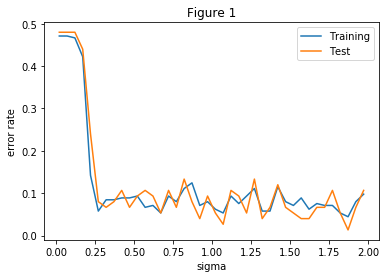

In [16]:
# Tune hyper-parameter sigma i.e s with fixed l = 30
s_start = 0.02
s_stop = 2
s_step = 0.05

errors_train = []
errors_test = []
sigmas = []
s = s_start
best_s = s_start
min_error = 1
while s <= s_stop:
    error_train, error_test = rbf_train(x_train, x_test, y_train, y_test, l = 30, s = s)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    sigmas.append(s)
    
    if error_test < min_error:
        best_s = s
        min_error = error_test    
    
    s = s + s_step

plt.plot(sigmas, errors_train, label = 'Training')
plt.plot(sigmas, errors_test, label = 'Test')
plt.legend()
plt.xlabel('sigma')
plt.ylabel('error rate')
plt.title('Figure 1')

C:\Users\Nini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


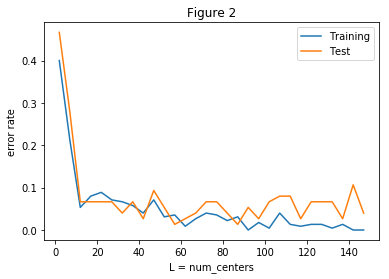

In [17]:
# Tune hyper-parameter sigma i.e s with fixed l = 30
l_start = 2
l_stop = 150
l_step = 5

errors_train = []
errors_test = []
Ls = []
l = l_start
best_l = l_start
min_error = 1
while l <= l_stop:
    error_train, error_test = rbf_train(x_train, x_test, y_train, y_test, l = l, s = best_s)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    Ls.append(l)
    
    if error_test < min_error:
        best_l = l
        min_error = error_test    
    
    l = l + l_step

plt.plot(Ls, errors_train, label = 'Training')
plt.plot(Ls, errors_test, label = 'Test')
plt.legend()
plt.xlabel('L = num_centers')
plt.ylabel('error rate')
plt.title('Figure 2')

In [18]:
print('The best sigma we found is:',round(best_s,4), ', best L is:',best_l)
print('Under the best setting we found, the minimal test error rate is:',round(min_error,4))

The best sigma we found is: 1.87 , best L is: 57
Under the best setting we found, the minimal test error rate is: 0.0133


<font color='red'>**Write your justfication here ...**</font> (as a *markdown* cell)

<p>Figure 1 shows how training error and test error change while the sigma changing from 0.02 to 2 with a steplength of 0.05 (with L fixed at 30)and Figure 2 shows the trends of training error and test error corresponding to L (with sigma fixed at the best value we found during the first part of tuning).</p>

<p>In figure 1, both errors are considerably high (about 0.5) when sigma is between 0 to 0.2, but drop fast when sigma increases. After sigma reaching 0.25, both rates are stabilized at some values around 0.03-0.05 with small fluctuations. </p>

<p>In figure 2, both error rates have the similar pattern as they had in figure 1 except the training error shows a slow decline instead of being stable at around 0.03-0.05.</p>

<p>The whole tuning process can be departed into two part, first for sigma and second for L. We use the k-means clustering method to find the centers of data points rather than choosing centers randomly. The reason we doing so is we want to find the most representative points as data centers. From the result of first section, initial L and sigma gives an error rate of 0.47. Considering whole data set only contains 300 data points, and 225 for training set, 30 is reasonablely large enough. So we fix L = 30 and tune sigma first, then L. The final minimal test error rate is 0.013 while at that point, training error is around 0.05, so there is no much sign of over-fitting at that point. </p>

<p>However, since we break the tuning into two stages as we did in the workshop, the best setting of parameters is only a local optimal setting. If we tune two parameters together, we may find a different 'best' setting.</p>

<br> </br>

### 1.3 Kernel Perceptron
Next, instead of directly computing a feature space transformation, we are going to use the kernel trick. Specifically, we are going to use the kernelised version of perceptron in combination with a few different kernels.

*In this section, you cannot use any libraries other than `numpy` and `matplotlib`.*

First, implement linear, polynomial and RBF kernels. The linear kernel is simply a dot product of its inputs, i.e., there is no feature space transformation. Polynomial and RBF kernels should be implemented as defined in the lecture slides.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [19]:
# Input:
# u,v - column vectors of the same dimensionality
#
# Output:
# v - a scalar
def linear_kernel(u, v):
    k = np.dot(u,v)
    return k

# Input:
# u,v - column vectors of the same dimensionality
# c,d - scalar parameters of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def polynomial_kernel(u, v, c = 0, d = 3):
    k = (np.dot(u,v) + c)**d
    return k

# Input:
# u,v - column vectors of the same dimensionality
# gamma - scalar parameter of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def rbf_kernel(u, v, gamma = 1):
    k = np.exp(- gamma * (np.linalg.norm(u-v, 2, 1))**2)
    return k

Kernel perceptron was a "green slides" topic, and you will not be asked about this method in the exam. Here, you are only asked to implement a simple prediction function following the provided equation. In kernel perceptron, the prediction for instance $\mathbf{x}$ is made based on the sign of

$$w_0 + \sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}_i, \mathbf{x})$$

Here $w_0$ is the bias term, $n$ is the number of training examples, $\alpha_i$ are learned weights, $\mathbf{x}_i$ and $y_i$ is the training dataset,and $K$ is the kernel.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [20]:
# Input:
# x_test - (r x m) matrix with instances for which to predict labels
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
#
# Output:
# y_pred - (r x 1) vector of predicted labels
def kernel_ptron_predict(x_test, X, y, alpha, bias, kernel):
    k = kernel(X[:,], x_test)
    y = y[:,0]
    pred_value = bias + sum(alpha * y * k)
    return np.sign(pred_value)

The code for kernel perceptron training is provided below. You can treat this function as a black box, but we encourage you to understand the implementation.

In [21]:
# Input:
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
# epochs - scalar, number of epochs
#
# Output:
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term

def kernel_ptron_train(X, y, kernel, epochs = 100):
    n, m = X.shape
    alpha = np.zeros(n)
    bias = 0
    updates = None
    for epoch in range(epochs):
        #print('epoch =', epoch, ', updates =', updates)
        updates = 0
        schedule = list(range(n))
        np.random.shuffle(schedule)
        
        for i in schedule:
            y_pred = kernel_ptron_predict(X[i], X, y, alpha, bias, kernel)

            
            if y_pred != y[i]:
                alpha[i] += 1
                bias += y[i]
                updates += 1

        if updates == 0:
            break
        
    return alpha, bias

Now use the above functions to train the perceptron. Use heldout validation, and compute the validation error for this method using each of the three kernels. Write a paragraph or two with analysis how the accuracy differs between the different kernels and choice of kernel parameters. Discuss the merits of a kernel approach versus direct basis expansion approach as was used in the previous section.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [22]:
# linear kernel, no additional parameters
def linear_train(x_train, y_train, x_test, y_test):
    alpha, bias = kernel_ptron_train(x_train, y_train, linear_kernel)

    y_hat_train = [kernel_ptron_predict(sample, x_train, y_train, 
                                        alpha, bias, linear_kernel) for sample in x_train]
    y_hat_test = [kernel_ptron_predict(sample, x_train, y_train, 
                                       alpha, bias, linear_kernel) for sample in x_test]

    error_train = error_rate(y_train, y_hat_train)   
    error_test =  error_rate(y_test, y_hat_test)
    
    return(error_train, error_test)

error_train, error_test = linear_train(x_train, y_train, x_test, y_test)
print ('Applying perceptron with linear kernel gave the training error of',error_train, 
       ', and the test error of',round(error_test,4))


Applying perceptron with linear kernel gave the training error of 0.0 , and the test error of 0.0533


In [23]:
from functools import partial

# polynomial kernel
def poly_train(x_train, y_train, x_test, y_test, c, d ):
    alpha, bias = kernel_ptron_train(x_train, y_train, partial(polynomial_kernel, c = c, d = d))

    y_hat_train = [kernel_ptron_predict(sample, x_train, y_train, 
                                        alpha, bias, partial(polynomial_kernel, c = c, d = d)) for sample in x_train]
    y_hat_test = [kernel_ptron_predict(sample, x_train, y_train, 
                                       alpha, bias, partial(polynomial_kernel, c = c, d = d)) for sample in x_test]

    error_train = error_rate(y_train, y_hat_train)   
    error_test =  error_rate(y_test, y_hat_test)
    return error_train, error_test

error_train,error_test = poly_train(x_train,y_train, x_test, y_test, 0, 3)
print ('Applying perceptron with polynomial kernel gave the training error of',error_train, 
       ', and the test error of',round(error_test,4))

Applying perceptron with polynomial kernel gave the training error of 0.0 , and the test error of 0.08


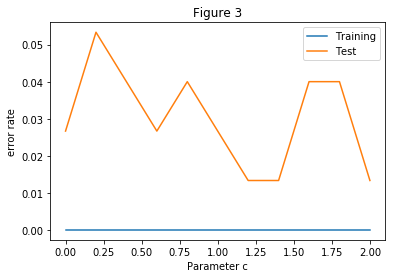

In [42]:
# Tune kernel parameter for polynomial kernel
# tune c first, we fix d as default
c_start = 0
c_stop = 2
c_step = 0.2

errors_train = []
errors_test = []
cs = []
c = c_start
best_c = c_start
min_error = 1
while c <= c_stop:
    error_train, error_test = poly_train(x_train,  y_train, x_test,y_test, c = c, d = 3)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    cs.append(c)
    
    if error_test < min_error:
        best_c = c
        min_error = error_test    
    
    c = c + c_step

plt.plot(cs, errors_train, label = 'Training')
plt.plot(cs, errors_test, label = 'Test')
plt.legend()
plt.xlabel('Parameter c')
plt.ylabel('error rate')
plt.title('Figure 3')

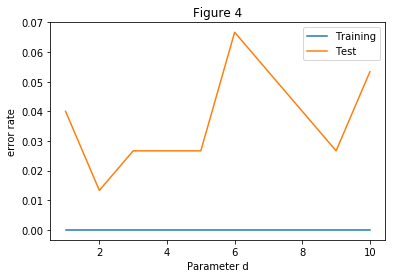

In [53]:
# Tune kernel parameter for polynomial kernel
# tune d first, we fix d as default
d_start = 1
d_stop = 10
d_step = 1

errors_train = []
errors_test = []
ds = []
d = d_start
best_d = d_start
min_error = 1
while d <= d_stop:
    error_train, error_test = poly_train(x_train,  y_train, x_test,y_test, c = best_c, d = d)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    ds.append(d)
    
    if error_test < min_error:
        best_d = d
        min_error = error_test    
    
    d = d + d_step

plt.plot(ds, errors_train, label = 'Training')
plt.plot(ds, errors_test, label = 'Test')
plt.legend()
plt.xlabel('Parameter d')
plt.ylabel('error rate')
plt.title('Figure 4')

In [54]:
print('The best c we found is:',round(best_c,4), ', best d is:',best_d)
print('Under the best setting we found, the minimal test error rate is:',round(min_error,4))

The best c we found is: 1.2 , best d is: 2
Under the best setting we found, the minimal test error rate is: 0.0133


In [35]:
# rbf kernel
def rbf_k_train(x_train, y_train, x_test, y_test, gamma ):
    alpha, bias = kernel_ptron_train(x_train, y_train, partial(rbf_kernel, gamma = gamma))

    y_hat_train = [kernel_ptron_predict(sample, x_train, y_train, 
                                        alpha, bias, partial(rbf_kernel, gamma = gamma)) for sample in x_train]
    y_hat_test = [kernel_ptron_predict(sample, x_train, y_train, 
                                       alpha, bias, partial(rbf_kernel, gamma = gamma)) for sample in x_test]

    error_train = error_rate(y_train, y_hat_train)   
    error_test =  error_rate(y_test, y_hat_test)
    return error_train, error_test

error_train,error_test = rbf_k_train(x_train,y_train, x_test, y_test, 1)
print ('Applying perceptron with RBF kernel gave the training error of',error_train, 
       ', and the test error of',round(error_test,4))

Applying perceptron with RBF kernel gave the training error of 0.0 , and the test error of 0.08


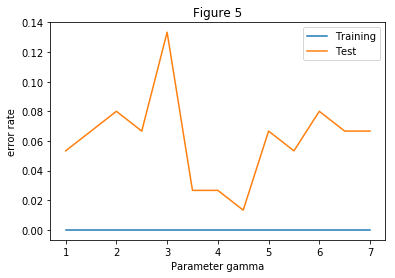

In [45]:
# Tune kernel parameter for rbf kernel

g_start = 1
g_stop = 7
g_step = 0.5

errors_train = []
errors_test = []
gs = []
g = g_start
best_g = g_start
min_error = 1
while g <= g_stop:
    error_train, error_test = rbf_k_train(x_train,  y_train, x_test,y_test, gamma = g)
    
    errors_train.append(error_train)
    errors_test.append(error_test)
    gs.append(g)
    
    if error_test < min_error:
        best_g = g
        min_error = error_test    
    
    g = g + g_step

plt.plot(gs, errors_train, label = 'Training')
plt.plot(gs, errors_test, label = 'Test')
plt.legend()
plt.xlabel('Parameter gamma')
plt.ylabel('error rate')
plt.title('Figure 5')

In [46]:
print('The best gamma we found is:',round(best_g,4))
print('Under the best setting we found, the minimal test error rate is:',round(min_error,4))

The best gamma we found is: 4.5
Under the best setting we found, the minimal test error rate is: 0.0133


In [47]:
# Analysis
# Compare the performance of three kernel
def random_train(X, y, best_c, best_d, best_g):
    lk_train = 0
    p_train = 0
    r_train =0

    lk_test = 0
    p_test = 0
    r_test =0

    lk =[]
    poly =[]
    rbfk =[]
    for i in range(1,50):
        x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.25)

        error_train_lk, error_test_lk = linear_train(x_train, y_train, x_test, y_test )
        error_train_poly, error_test_poly = poly_train(x_train,  y_train, x_test,y_test, c = best_c, d = best_d)
        error_train_rbfk, error_test_rbfk = rbf_k_train(x_train, y_train, x_test, y_test, gamma = best_g )

        lk.append(error_test_lk)
        poly.append(error_test_poly)
        rbfk.append(error_test_rbfk)

        lk_train = lk_train + error_train_lk
        lk_test = lk_test + error_test_lk

        p_train = p_train + error_train_poly
        p_test = p_test + error_test_poly

        r_train = r_train + error_train_rbfk
        r_test = r_test + error_test_rbfk

    avg_lk_train = round(lk_train / 50.0, 8)
    avg_lk_test = round(lk_test / 50.0, 8)

    avg_poly_train = round(p_train / 50.0, 8)
    avg_poly_test = round(p_test / 50.0, 8)

    avg_rbfk_train = round(r_train / 50.0, 8)
    avg_rbfk_test = round(r_test / 50.0, 8)

    print('Linear kernel ---- average training error:',avg_lk_train,' average test error',avg_lk_test)
    print('Polynomial kernel ---- average training error:',avg_poly_train,' average test error',avg_poly_test)
    print('RBF kernel ---- average training error:',avg_rbfk_train,' average test error',avg_rbfk_test)
    
    return lk,poly,rbfk
lk,poly,rbfk = random_train(X,y, best_c, best_d, best_g)

Linear kernel ---- average training error: 0.0  average test error 0.04826667
Polynomial kernel ---- average training error: 0.0  average test error 0.052
RBF kernel ---- average training error: 0.0  average test error 0.06853333


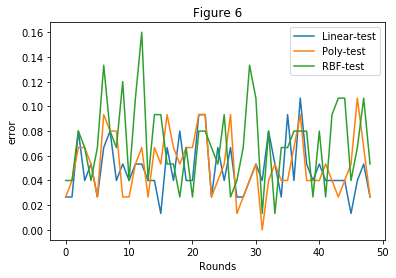

In [49]:
plt.plot(lk, label = 'Linear-test')
plt.plot(poly, label = 'Poly-test')
plt.plot(rbfk, label = 'RBF-test')
plt.legend()
plt.xlabel('Rounds')
plt.ylabel('error')
plt.title('Figure 6')

<font color='red'>**Provide your analysis here ...**</font> (as a *markdown* cell)

<p>**Choice of kernel parameters**</p>
<p> **Linear kernel**: No hyperparameter. Training error was 0.0 and test error was 0.053.</p>
<p> **Polynomial kernel**: the trends of test error for both c and d shows significant fluctuation and high level of volatility while training error keeps remaining as 0.00. Before tuning, the training error was 0.0, test error was 0.08. After tuning, the best c we found is 1.2 and best d is 2. Training error is still 0.0 while test error 0.013. Since the test error is much lower than 0.08, we consider it is a better setting and did give a better fit. However, during the process of training, our test error is always higher than training error, the model does not have very good ability to predict unseen data. There are some over-fitting issues (See Figure 3 and 4).</p>
<p> **RBF kernel**: We test different gamma with the RBF model, and the trends of training error and test error are shown above in Figure 5. The trend of test error show large fluctuation but training error remains as 0.0. The minimal test error on the test is 0.013 which is much lower than the test error before tuning (was 0.08). However, it has the same issue as polynomial kernel, the model's training error is always lower than test error, which implies over-fitting.</p>

<p>**Compare different kernels**</p>
The figure 6 above shows the three different kernels' performance on 50 random splits. We use the best c, d and gamma we found in previous training, train and test on the split datasets. According to the graph, generally, the polynomial kernel did a slightly better job than the linear kernel. RBF is the second best kernel. But the performance varies greatly when the split changes, since the best parameters we found are not global optimal and there is over-fitting of some degree.</p>


### 1.4 Dimensionality Reduction
Yet another approach to working with complex data is to use a non-linear dimensionality reduction. To see how this might work, first apply a couple of dimensionality reduction methods and inspect the results.

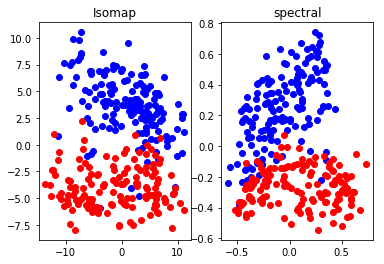

In [59]:
from sklearn import manifold

X = digits[:, 0:784]
y = np.squeeze(digits[:, 784:785])

# n_components refers to the number of dimensions after mapping
# n_neighbors is used for graph construction
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)

# n_components refers to the number of dimensions after mapping
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0)
X_se = embedder.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_iso[y==-1,0], X_iso[y==-1,1], "bo")
ax1.plot(X_iso[y==1,0], X_iso[y==1,1], "ro")
ax1.set_title('Isomap')
ax2.plot(X_se[y==-1,0], X_se[y==-1,1], "bo")
ax2.plot(X_se[y==1,0], X_se[y==1,1], "ro")
ax2.set_title('spectral')

In a few sentences, explain how a dimensionality reduction algorithm can be used for your binary classification task.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

<p> Dimension reduction can be useful in our binary classifier in many ways:</p>
<p> 1. By applying dimension reduction on the dataset before doing any classification can reduce the computational cost and memory cost. In the following section, we applied SVM on the dataset with the number of dimensions reduced to 10. The whole training cost is lower than training on the original data set.</p>
<p> 2. Some dataset can be non-linear-separable on the higher feature space but may be linear separable on the lower feature space. Such as the figure above, we can not say it is completely linear separatable in the 2-dimension space, but it's more close to linear-separable then in higher dimensional space. A binary classifier may have better performance on that such lower feature space.</p>
<p> 3. It can help us to find hidden patterns in lower feature space. </p>

Implement such an approach and assess the result. For simplicity, we will assume that both training and test data are available ahead of time, and thus the datasets should be used together for dimensionality reduction, after which you can split off a test set for measuring generalisation error. *Hint: you do not have to reduce number of dimensions to two. You are welcome to use the sklearn library for this question.*
 
<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [64]:
# Set num_components = 10
n = 10
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
X_se = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(X)

x_train_iso, x_test_iso, y_train_iso, y_test_iso = train_test_split(X_iso, y , test_size = 0.25)
x_train_se, x_test_se, y_train_se, y_test_se = train_test_split(X_se, y , test_size = 0.25)

In [65]:
from sklearn.svm import SVC
# SVM with Isomap
clf = SVC()
clf.fit(x_train_iso, y_train_iso)

y_hat_iso_train = clf.predict(x_train_iso)
y_hat_iso_test = clf.predict(x_test_iso)

error_train = error_rate(y_train_iso, y_hat_iso_train)
error_test = error_rate(y_test_iso, y_hat_iso_test)
print('SVM with Isomap: Traing error:',round(error_train, 4), 'test error:', round(error_test, 4))

SVM with Isomap: Traing error: 0.0356 test error: 0.0533


In [66]:
# SVM with spectral
clf.fit(x_train_se, y_train_se)

y_hat_se_train = clf.predict(x_train_se)
y_hat_se_test = clf.predict(x_test_se)

error_train = error_rate(y_train_se, y_hat_se_train)
error_test = error_rate(y_test_se, y_hat_se_test)
print('SVM with Spectral: Traing error:',round(error_train, 4), 'test error:', round(error_test, 4))

SVM with Spectral: Traing error: 0.0889 test error: 0.08


In a few sentences, comment on the merits of the dimensionality reduction based approach compared to linear classification from Section 1.1 and basis expansion from Section 1.2.

<font color='red'>**Write your answer here ...**</font> (as a *markdown* cell)

<p>Comparing the results we got in section 1.1 and section 1.2 to the SVM with dimension reduction, SVM with dimension reduction has higher test errors, which may be caused by the choice of components number is not optimal and the reduction process loses some important features in higher dimensional space. Both models with dimension reduction do not show much evidence of over-fitting. With enough epochs, linear perceptron performs well on this specific task (test error is 0.013) and so does basis expansion. But linear perceptron has the risk of over-fitting, while basis expansion does not show obvious sign of over-fitting.</p>

## 2. Kaggle Competition
The final part of the project is a competition, on more challenging digit data sourced from natural scenes. This data is coloured, pixelated or otherwise blurry, and the digits are not perfectly centered. It is often difficult for humans to classify! The dataset is also considerably larger. 

Please sign up to the [COMP90051 Kaggle competition](https://inclass.kaggle.com/c/comp90051-2017) using your `student.unimelb.edu.au` email address. Then download the file `data.npz` from Kaggle. This is a compressed `numpy` data file containing three ndarray objects:
 - `train_X` training set, with 4096 input features (greyscale pixel values);
 - `train_Y` training labels (0-9)
 - `test_X` test set, with 4096 input features, as per above
 
Each image is 64x64 pixels in size, which has been flattened into a vector of 4096 values. You should load the files using `np.load`, from which you can extract the three elements. You may need to transpose the images for display, as they were flattened in a different order. Each pixel has an intensity value between 0-255. For those using languages other than python, you may need to output these objects in another format, e.g., as a matlab matrix.

Your job is to develop a *multiclass* classifier on this dataset. You can use whatever techniques you like, such as the perceptron code from above, or other methods such as *k*NN, logistic regression, neural networks, etc. You may want to compare several methods, or try an ensemble combination of systems. You are free to use any python libraries for this question. Note that some fancy machine learning algorithms can take several hours or days to train (we impose no time limits), so please start early to allow sufficient time. *Note that you may want to sample smaller training sets, if runtime is an issue, however this will degrade your accuracy. Sub-sampling is a sensible strategy when developing your code.*

You may also want to do some basic image processing, however, as this is not part of the subject, we would suggest that you focus most of your efforts on the machine learning. For inspiration, please see [Yan Lecun's MNIST page](http://yann.lecun.com/exdb/mnist/), specifically the table of results and the listed papers. Note that your dataset is harder than MNIST, so your mileage may vary.

### 2.1 Making Submissions

This will be setup as a *Kaggle in class* competition, in which you can upload your system predictions on the test set. You should format your predictions as a csv file, with the same number of lines as the test set, and each line comprising two numbers `id, class` where *id* is the instance number (increasing integers starting from 1) and *class* is an integer between 0-9, corresponding to your system prediction. E.g., 
```
Id,Label
1,9
2,9
3,4
4,5
5,1
...```
based on the first five predictions of the system being classes `9 9 4 5 1`. See the `sample_submission.csv` for an example file.

Kaggle will report your accuracy on a public portion of the test set, and maintain a leaderboard showing the performance of you and your classmates. You will be allowed to upload up to four submissions each day. At the end of the competition, you should nominate your best submission, which will be scored on the private portion of the test set. The accuracy of your system (i.e., proportion of correctly classified examples) on the private test set will be used for grading your approach.

**Marks will be assigned as follows**:
 - position in the class, where all students are ranked and then the ranks are linearly scaled to <br>0 marks (worst in class) - 4 marks (best in class) 
 - absolute performance (4 marks), banded as follows (rounded to nearest integer): 
 <br>below 80% = 0 marks; 80-89% = 1; 90-92% = 2; 93-94% = 3; above 95% = 4 marks

Note that you are required to submit your code with this notebook, submitted to the LMS. Failure to provide your implementation may result in assigning zero marks for the competition part, irrespective of the competition standing. Your implementation should be able to exactly reproduce submitted final Kaggle entry, and match your description below.

### 2.2. Method Description
Describe your approach, and justify each of the choices made within your approach. You should write a document with no more than 400 words, as a **PDF** file (not *docx* etc) with up to 2 pages of A4 (2 sides). Text must only appear on the first page, while the second page is for *figures and tables only*. Please use a font size of 11pt or higher. Please consider using `pdflatex` for the report, as it's considerably better for this purpose than wysiwyg document editors. You are encouraged to include empirical results, e.g., a table of results, graphs, or other figures to support your argument. *(this will contribute 9 marks; note that we are looking for clear presentation, sound reasoning, good evaluation and error analysis, as well as general ambition of approach.)*